In [2]:
# Reimportar librerías y volver a cargar el archivo tras el reinicio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# Conjunto original

In [ ]:

df = pd.read_csv('original.csv', sep=';')


print("=" * 80)
print("📊 ANÁLISIS DE ESTRUCTURA DEL DATASET DE ESTUDIANTES")
print("=" * 80)

# 1. DIMENSIONALIDAD
print("\n🔢 1. DIMENSIONALIDAD")
print("-" * 30)
print(f"Número de filas (registros): {df.shape[0]:,}")
print(f"Número de columnas (variables): {df.shape[1]:,}")
print(f"Total de celdas: {df.shape[0] * df.shape[1]:,}")

# 2. INFORMACIÓN GENERAL
print(f"\nTamaño en memoria: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 3. ANÁLISIS DE TIPOS DE VARIABLES
print("\n📝 2. ANÁLISIS DE TIPOS DE VARIABLES")
print("-" * 40)

# Identificar tipos de variables automáticamente
numeric_vars = []
categorical_vars = []
binary_vars = []
date_vars = []
id_vars = []
mixed_vars = []

for col in df.columns:
    # Verificar si es fecha
    if 'FECHA' in col.upper():
        date_vars.append(col)
    # Verificar si es ID o código
    elif any(keyword in col.upper() for keyword in ['COD_', 'CODIGO', 'DOCUMENTO']):
        id_vars.append(col)
    else:
        # Analizar el contenido de la columna
        non_null_values = df[col].dropna()
        unique_values = non_null_values.unique()
        
        # Variables binarias (solo 2 valores únicos)
        if len(unique_values) == 2:
            binary_vars.append(col)
        # Variables numéricas
        elif df[col].dtype in ['int64', 'float64']:
            numeric_vars.append(col)
        # Variables categóricas
        else:
            categorical_vars.append(col)

print(f"🔢 Variables Numéricas ({len(numeric_vars)}):")
for var in numeric_vars:
    print(f"   • {var}")

print(f"\n📂 Variables Categóricas ({len(categorical_vars)}):")
for var in categorical_vars:
    unique_count = df[var].nunique()
    print(f"   • {var} ({unique_count} categorías únicas)")

print(f"\n⚡ Variables Binarias ({len(binary_vars)}):")
for var in binary_vars:
    values = df[var].dropna().unique()
    print(f"   • {var} (valores: {', '.join(map(str, values))})")

print(f"\n📅 Variables de Fecha ({len(date_vars)}):")
for var in date_vars:
    print(f"   • {var}")

print(f"\n🔑 Variables Identificadoras/Códigos ({len(id_vars)}):")
for var in id_vars:
    unique_count = df[var].nunique()
    print(f"   • {var} ({unique_count} valores únicos)")

# 4. ANÁLISIS DE CLAVES ÚNICAS E IDENTIFICADORES
print("\n🔑 3. ANÁLISIS DE CLAVES ÚNICAS E IDENTIFICADORES")
print("-" * 50)

# Buscar posibles claves primarias
primary_key_candidates = []
for col in df.columns:
    if df[col].nunique() == len(df) and not df[col].isnull().any():
        primary_key_candidates.append(col)

print("🎯 Candidatos a Clave Primaria:")
if primary_key_candidates:
    for candidate in primary_key_candidates:
        print(f"   • {candidate}")
else:
    print("   • No se encontraron claves primarias únicas")

# Análisis de duplicados
print(f"\n📋 Análisis de Duplicados:")
print(f"   • Filas duplicadas completas: {df.duplicated().sum()}")

# Buscar posibles claves foráneas (códigos que se repiten)
print("\n🔗 Posibles Claves Foráneas (códigos con múltiples referencias):")
foreign_key_candidates = []
for col in id_vars:
    unique_count = df[col].nunique()
    total_count = len(df[col].dropna())
    if unique_count < total_count and unique_count > 1:
        foreign_key_candidates.append((col, unique_count, total_count))

for fk, unique, total in sorted(foreign_key_candidates, key=lambda x: x[1]):
    repetition_rate = (total - unique) / total * 100
    print(f"   • {fk}: {unique} valores únicos, {total} registros ({repetition_rate:.1f}% repetición)")

# 5. ANÁLISIS DE VALORES FALTANTES
print("\n❓ 4. ANÁLISIS DE VALORES FALTANTES")
print("-" * 40)

missing_analysis = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    if missing_count > 0:
        missing_analysis.append((col, missing_count, missing_pct))

if missing_analysis:
    missing_analysis.sort(key=lambda x: x[2], reverse=True)
    print("Variables con valores faltantes:")
    for col, count, pct in missing_analysis:
        print(f"   • {col}: {count} valores faltantes ({pct:.1f}%)")
else:
    print("✅ No se encontraron valores faltantes")

# 6. ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
print("\n📈 5. ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
print("-" * 55)

if numeric_vars:
    numeric_stats = df[numeric_vars].describe()
    print(numeric_stats.round(2))
else:
    print("No hay variables numéricas para analizar")

# 7. RESUMEN DE CARDINALIDAD
print("\n🎯 6. RESUMEN DE CARDINALIDAD (Top variables con más categorías)")
print("-" * 65)

cardinality_analysis = []
for col in df.columns:
    unique_count = df[col].nunique()
    cardinality_analysis.append((col, unique_count))

cardinality_analysis.sort(key=lambda x: x[1], reverse=True)

print("Top 10 variables por número de valores únicos:")
for i, (col, unique_count) in enumerate(cardinality_analysis[:10], 1):
    percentage = (unique_count / len(df)) * 100
    print(f"{i:2d}. {col}: {unique_count} valores únicos ({percentage:.1f}% del total)")

# 8. ANÁLISIS ESPECÍFICO PARA MACHINE LEARNING
print("\n🤖 7. CONSIDERACIONES PARA MACHINE LEARNING")
print("-" * 45)

print("📊 Variables Target Potenciales:")
target_candidates = ['PAPA', 'PROME_ACADE', 'AVANCE_CARRERA', 'NUMERO_MATRICULAS', 'PUNTAJE_ADMISION']
available_targets = [var for var in target_candidates if var in df.columns]

for var in available_targets:
    if df[var].dtype in ['int64', 'float64']:
        non_null_count = df[var].count()
        min_val = df[var].min()
        max_val = df[var].max()
        print(f"   • {var}: {non_null_count} valores válidos, rango [{min_val} - {max_val}]")

print(f"\n🔄 Variables que requieren preprocesamiento:")
preprocessing_needed = []

# Variables categóricas con alta cardinalidad
high_cardinality = [(col, df[col].nunique()) for col in categorical_vars if df[col].nunique() > 20]
if high_cardinality:
    print("   📂 Categóricas con alta cardinalidad (>20 categorías):")
    for col, count in high_cardinality:
        print(f"      • {col}: {count} categorías")
        preprocessing_needed.append(f"{col} (encoding)")

# Variables de fecha
if date_vars:
    print("   📅 Variables de fecha (requieren feature engineering):")
    for var in date_vars:
        print(f"      • {var}")
        preprocessing_needed.append(f"{var} (datetime features)")

# Variables con valores faltantes significativos
high_missing = [(col, pct) for col, count, pct in missing_analysis if pct > 10]
if high_missing:
    print("   ❓ Variables con >10% valores faltantes:")
    for col, pct in high_missing:
        print(f"      • {col}: {pct:.1f}% faltantes")
        preprocessing_needed.append(f"{col} (imputation)")

print(f"\n⚙️ Recomendaciones de preprocesamiento:")
if preprocessing_needed:
    for i, rec in enumerate(preprocessing_needed, 1):
        print(f"   {i}. {rec}")
else:
    print("   ✅ Datos parecen estar en buen estado para ML")

# 9. ESTRUCTURA DE DATOS JERÁRQUICA
print("\n🏗️ 8. ESTRUCTURA JERÁRQUICA IDENTIFICADA")
print("-" * 45)

hierarchy_levels = [
    ('SEDE', 'Nivel Universidad'),
    ('COD_FACULTAD', 'FACULTAD', 'Nivel Facultad'),
    ('COD_PLAN', 'PLAN', 'Nivel Programa'),
    ('DOCUMENTO', 'Nivel Estudiante')
]

print("Jerarquía de datos identificada:")
for level in hierarchy_levels:
    if len(level) == 3:
        code_col, name_col, description = level
        if code_col in df.columns and name_col in df.columns:
            unique_codes = df[code_col].nunique()
            unique_names = df[name_col].nunique()
            print(f"   • {description}: {unique_codes} códigos, {unique_names} nombres")
    else:
        col, description = level
        if col in df.columns:
            unique_count = df[col].nunique()
            print(f"   • {description}: {unique_count} registros únicos")

print("\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETADO")
print("=" * 80)

# Mostrar un resumen final
print(f"\n📋 RESUMEN EJECUTIVO:")
print(f"   • Dataset con {df.shape[0]:,} estudiantes y {df.shape[1]} variables")
print(f"   • {len(numeric_vars)} variables numéricas, {len(categorical_vars)} categóricas")
print(f"   • {len(binary_vars)} variables binarias, {len(date_vars)} de fecha")
print(f"   • {len(id_vars)} identificadores/códigos")
print(f"   • {len([x for x in missing_analysis if x[2] > 0])} variables con datos faltantes")
print(f"   • Listo para aplicar XGBoost, Random Forest y SVM con preprocesamiento adecuado")

📊 ANÁLISIS DE ESTRUCTURA DEL DATASET DE ESTUDIANTES

🔢 1. DIMENSIONALIDAD
------------------------------
Número de filas (registros): 1,445
Número de columnas (variables): 52
Total de celdas: 75,140

Tamaño en memoria: 3101.96 KB

📝 2. ANÁLISIS DE TIPOS DE VARIABLES
----------------------------------------
🔢 Variables Numéricas (11):
   • CONVENIO_PLAN
   • AVANCE_CARRERA
   • EDAD
   • NUMERO_MATRICULAS
   • PAPA
   • PROME_ACADE
   • PBM_CALCULADO
   • ESTRATO
   • TELEFONO2
   • CARNET_UN
   • PUNTAJE_ADMISION

📂 Variables Categóricas (18):
   • SEDE (1 categorías únicas)
   • FACULTAD (1 categorías únicas)
   • PLAN (6 categorías únicas)
   • NIVEL (1 categorías únicas)
   • SUBACCESO (5 categorías únicas)
   • CONVOCATORIA (12 categorías únicas)
   • APERTURA (12 categorías únicas)
   • DEPTO_RESIDENCIA (5 categorías únicas)
   • MUNICIPIO_RESIDENCIA (28 categorías únicas)
   • PROVINCIA_NACIMIENTO (20 categorías únicas)
   • MUNICIPIO_NACIMIENTO (94 categorías únicas)
   • PAIS_N

# Conjunto despues de eliminar columnas

In [3]:


df = pd.read_excel('df_objetivo/df_objetivo_riesgo_real.xlsx')


print("=" * 80)
print("📊 ANÁLISIS DE ESTRUCTURA DEL DATASET DE ESTUDIANTES")
print("=" * 80)

# 1. DIMENSIONALIDAD
print("\n🔢 1. DIMENSIONALIDAD")
print("-" * 30)
print(f"Número de filas (registros): {df.shape[0]:,}")
print(f"Número de columnas (variables): {df.shape[1]:,}")
print(f"Total de celdas: {df.shape[0] * df.shape[1]:,}")

# 2. INFORMACIÓN GENERAL
print(f"\nTamaño en memoria: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 3. ANÁLISIS DE TIPOS DE VARIABLES
print("\n📝 2. ANÁLISIS DE TIPOS DE VARIABLES")
print("-" * 40)

# Identificar tipos de variables automáticamente
numeric_vars = []
categorical_vars = []
binary_vars = []
date_vars = []
id_vars = []
mixed_vars = []

for col in df.columns:
    # Verificar si es fecha
    if 'FECHA' in col.upper():
        date_vars.append(col)
    # Verificar si es ID o código
    elif any(keyword in col.upper() for keyword in ['COD_', 'CODIGO', 'DOCUMENTO']):
        id_vars.append(col)
    else:
        # Analizar el contenido de la columna
        non_null_values = df[col].dropna()
        unique_values = non_null_values.unique()
        
        # Variables binarias (solo 2 valores únicos)
        if len(unique_values) == 2:
            binary_vars.append(col)
        # Variables numéricas
        elif df[col].dtype in ['int64', 'float64']:
            numeric_vars.append(col)
        # Variables categóricas
        else:
            categorical_vars.append(col)

print(f"🔢 Variables Numéricas ({len(numeric_vars)}):")
for var in numeric_vars:
    print(f"   • {var}")

print(f"\n📂 Variables Categóricas ({len(categorical_vars)}):")
for var in categorical_vars:
    unique_count = df[var].nunique()
    print(f"   • {var} ({unique_count} categorías únicas)")

print(f"\n⚡ Variables Binarias ({len(binary_vars)}):")
for var in binary_vars:
    values = df[var].dropna().unique()
    print(f"   • {var} (valores: {', '.join(map(str, values))})")

print(f"\n📅 Variables de Fecha ({len(date_vars)}):")
for var in date_vars:
    print(f"   • {var}")

print(f"\n🔑 Variables Identificadoras/Códigos ({len(id_vars)}):")
for var in id_vars:
    unique_count = df[var].nunique()
    print(f"   • {var} ({unique_count} valores únicos)")

# 4. ANÁLISIS DE CLAVES ÚNICAS E IDENTIFICADORES
print("\n🔑 3. ANÁLISIS DE CLAVES ÚNICAS E IDENTIFICADORES")
print("-" * 50)

# Buscar posibles claves primarias
primary_key_candidates = []
for col in df.columns:
    if df[col].nunique() == len(df) and not df[col].isnull().any():
        primary_key_candidates.append(col)

print("🎯 Candidatos a Clave Primaria:")
if primary_key_candidates:
    for candidate in primary_key_candidates:
        print(f"   • {candidate}")
else:
    print("   • No se encontraron claves primarias únicas")

# Análisis de duplicados
print(f"\n📋 Análisis de Duplicados:")
print(f"   • Filas duplicadas completas: {df.duplicated().sum()}")

# Buscar posibles claves foráneas (códigos que se repiten)
print("\n🔗 Posibles Claves Foráneas (códigos con múltiples referencias):")
foreign_key_candidates = []
for col in id_vars:
    unique_count = df[col].nunique()
    total_count = len(df[col].dropna())
    if unique_count < total_count and unique_count > 1:
        foreign_key_candidates.append((col, unique_count, total_count))

for fk, unique, total in sorted(foreign_key_candidates, key=lambda x: x[1]):
    repetition_rate = (total - unique) / total * 100
    print(f"   • {fk}: {unique} valores únicos, {total} registros ({repetition_rate:.1f}% repetición)")

# 5. ANÁLISIS DE VALORES FALTANTES
print("\n❓ 4. ANÁLISIS DE VALORES FALTANTES")
print("-" * 40)

missing_analysis = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    if missing_count > 0:
        missing_analysis.append((col, missing_count, missing_pct))

if missing_analysis:
    missing_analysis.sort(key=lambda x: x[2], reverse=True)
    print("Variables con valores faltantes:")
    for col, count, pct in missing_analysis:
        print(f"   • {col}: {count} valores faltantes ({pct:.1f}%)")
else:
    print("✅ No se encontraron valores faltantes")

# 6. ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
print("\n📈 5. ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS")
print("-" * 55)

if numeric_vars:
    numeric_stats = df[numeric_vars].describe()
    print(numeric_stats.round(2))
else:
    print("No hay variables numéricas para analizar")

# 7. RESUMEN DE CARDINALIDAD
print("\n🎯 6. RESUMEN DE CARDINALIDAD (Top variables con más categorías)")
print("-" * 65)

cardinality_analysis = []
for col in df.columns:
    unique_count = df[col].nunique()
    cardinality_analysis.append((col, unique_count))

cardinality_analysis.sort(key=lambda x: x[1], reverse=True)

print("Top 10 variables por número de valores únicos:")
for i, (col, unique_count) in enumerate(cardinality_analysis[:10], 1):
    percentage = (unique_count / len(df)) * 100
    print(f"{i:2d}. {col}: {unique_count} valores únicos ({percentage:.1f}% del total)")

# 8. ANÁLISIS ESPECÍFICO PARA MACHINE LEARNING
print("\n🤖 7. CONSIDERACIONES PARA MACHINE LEARNING")
print("-" * 45)

print("📊 Variables Target Potenciales:")
target_candidates = ['PAPA', 'PROME_ACADE', 'AVANCE_CARRERA', 'NUMERO_MATRICULAS', 'PUNTAJE_ADMISION']
available_targets = [var for var in target_candidates if var in df.columns]

for var in available_targets:
    if df[var].dtype in ['int64', 'float64']:
        non_null_count = df[var].count()
        min_val = df[var].min()
        max_val = df[var].max()
        print(f"   • {var}: {non_null_count} valores válidos, rango [{min_val} - {max_val}]")

print(f"\n🔄 Variables que requieren preprocesamiento:")
preprocessing_needed = []

# Variables categóricas con alta cardinalidad
high_cardinality = [(col, df[col].nunique()) for col in categorical_vars if df[col].nunique() > 20]
if high_cardinality:
    print("   📂 Categóricas con alta cardinalidad (>20 categorías):")
    for col, count in high_cardinality:
        print(f"      • {col}: {count} categorías")
        preprocessing_needed.append(f"{col} (encoding)")

# Variables de fecha
if date_vars:
    print("   📅 Variables de fecha (requieren feature engineering):")
    for var in date_vars:
        print(f"      • {var}")
        preprocessing_needed.append(f"{var} (datetime features)")

# Variables con valores faltantes significativos
high_missing = [(col, pct) for col, count, pct in missing_analysis if pct > 10]
if high_missing:
    print("   ❓ Variables con >10% valores faltantes:")
    for col, pct in high_missing:
        print(f"      • {col}: {pct:.1f}% faltantes")
        preprocessing_needed.append(f"{col} (imputation)")

print(f"\n⚙️ Recomendaciones de preprocesamiento:")
if preprocessing_needed:
    for i, rec in enumerate(preprocessing_needed, 1):
        print(f"   {i}. {rec}")
else:
    print("   ✅ Datos parecen estar en buen estado para ML")

# 9. ESTRUCTURA DE DATOS JERÁRQUICA
print("\n🏗️ 8. ESTRUCTURA JERÁRQUICA IDENTIFICADA")
print("-" * 45)

hierarchy_levels = [
    ('SEDE', 'Nivel Universidad'),
    ('COD_FACULTAD', 'FACULTAD', 'Nivel Facultad'),
    ('COD_PLAN', 'PLAN', 'Nivel Programa'),
    ('DOCUMENTO', 'Nivel Estudiante')
]

print("Jerarquía de datos identificada:")
for level in hierarchy_levels:
    if len(level) == 3:
        code_col, name_col, description = level
        if code_col in df.columns and name_col in df.columns:
            unique_codes = df[code_col].nunique()
            unique_names = df[name_col].nunique()
            print(f"   • {description}: {unique_codes} códigos, {unique_names} nombres")
    else:
        col, description = level
        if col in df.columns:
            unique_count = df[col].nunique()
            print(f"   • {description}: {unique_count} registros únicos")

print("\n" + "=" * 80)
print("✅ ANÁLISIS COMPLETADO")
print("=" * 80)

# Mostrar un resumen final
print(f"\n📋 RESUMEN EJECUTIVO:")
print(f"   • Dataset con {df.shape[0]:,} estudiantes y {df.shape[1]} variables")
print(f"   • {len(numeric_vars)} variables numéricas, {len(categorical_vars)} categóricas")
print(f"   • {len(binary_vars)} variables binarias, {len(date_vars)} de fecha")
print(f"   • {len(id_vars)} identificadores/códigos")
print(f"   • {len([x for x in missing_analysis if x[2] > 0])} variables con datos faltantes")
print(f"   • Listo para aplicar XGBoost, Random Forest y SVM con preprocesamiento adecuado")

📊 ANÁLISIS DE ESTRUCTURA DEL DATASET DE ESTUDIANTES

🔢 1. DIMENSIONALIDAD
------------------------------
Número de filas (registros): 1,283
Número de columnas (variables): 25
Total de celdas: 32,075

Tamaño en memoria: 1438.98 KB

📝 2. ANÁLISIS DE TIPOS DE VARIABLES
----------------------------------------
🔢 Variables Numéricas (10):
   • AVANCE_CARRERA
   • EDAD
   • NUMERO_MATRICULAS
   • PAPA
   • PROME_ACADE
   • PBM_CALCULADO
   • ESTRATO
   • PUNTAJE_ADMISION
   • AVANCE_ESPERADO
   • ATRASO_PORCENTUAL

📂 Variables Categóricas (10):
   • SEDE (1 categorías únicas)
   • PLAN (6 categorías únicas)
   • SUBACCESO (5 categorías únicas)
   • APERTURA (11 categorías únicas)
   • MUNICIPIO_RESIDENCIA (22 categorías únicas)
   • MUNICIPIO_NACIMIENTO (90 categorías únicas)
   • DISCAPACIDAD (6 categorías únicas)
   • CARACTER_COLEGIO (3 categorías únicas)
   • MUNICIPIO_RESIDENCIA_FAM (47 categorías únicas)
   • NODO_INICIO (6 categorías únicas)

⚡ Variables Binarias (4):
   • GENERO (val

# Descripciones

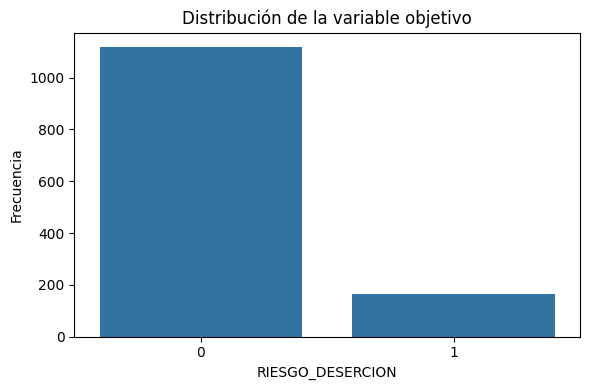

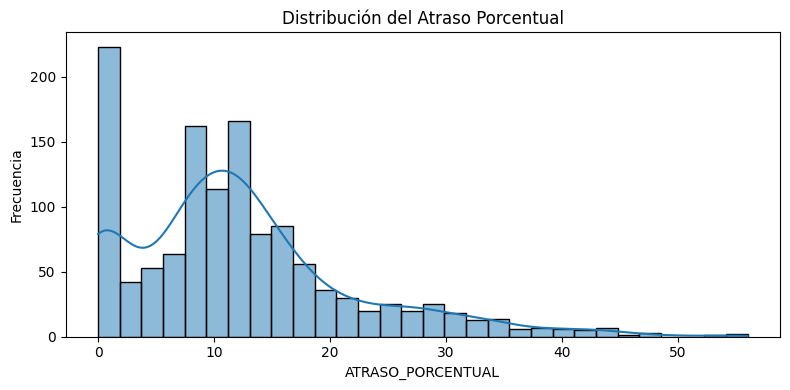

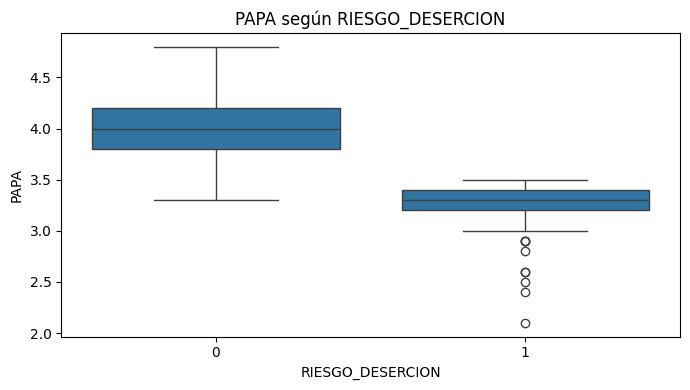

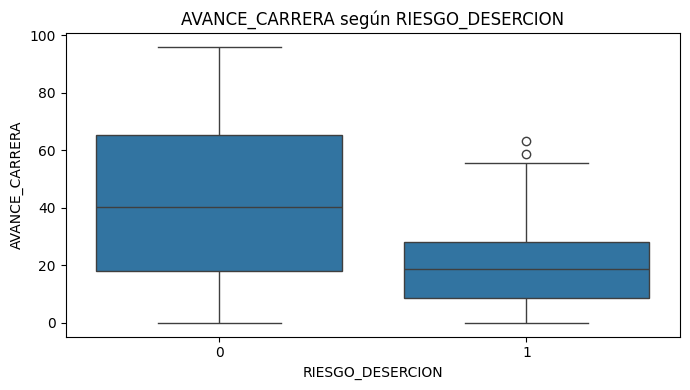

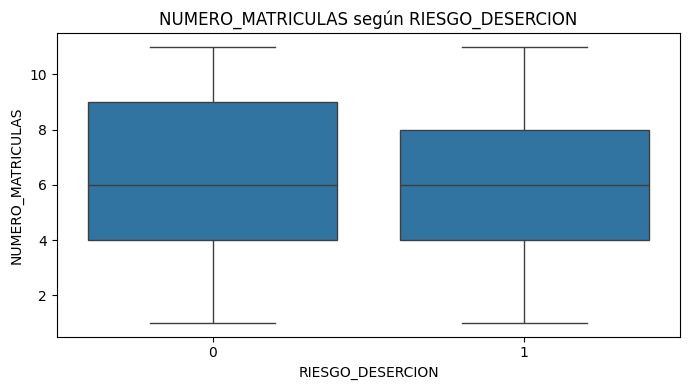

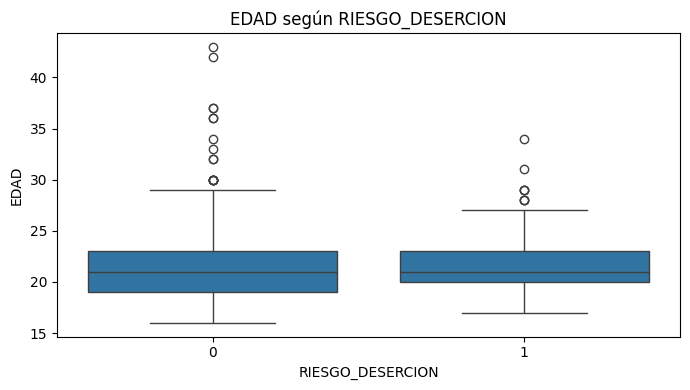

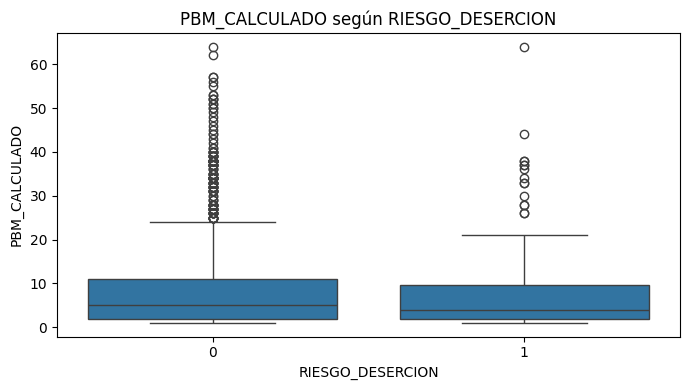

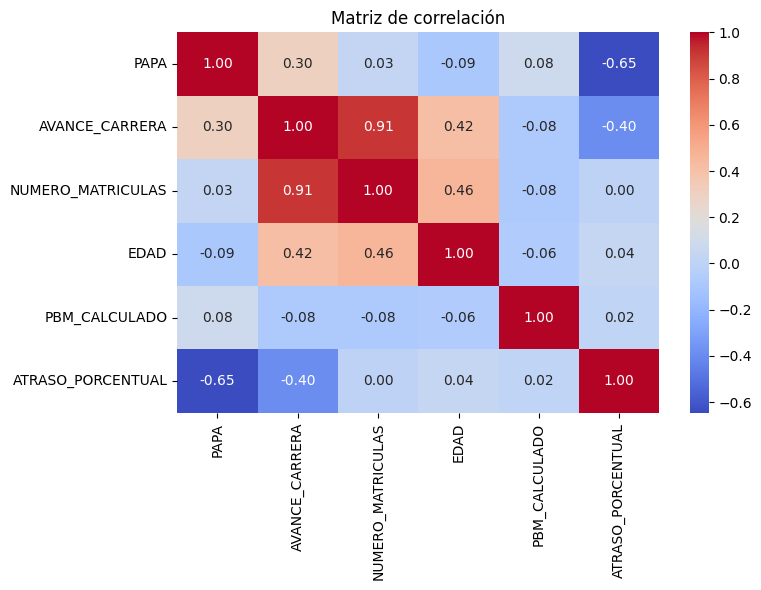

MUNICIPIO_RESIDENCIA    67.809821
PUNTAJE_ADMISION        27.357755
PAPA                     7.170694
PROME_ACADE              7.170694
MUNICIPIO_NACIMIENTO     0.779423
dtype: float64

In [4]:

# Cargar dataset actualizado
df = pd.read_excel("df_objetivo/df_objetivo_riesgo_desercion.xlsx")

# --------------------------
# 1. ESTADÍSTICOS NUMÉRICOS
# --------------------------
estadisticas_numericas = df.describe().T

# --------------------------
# 2. DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
# --------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="RIESGO_DESERCION")
plt.title("Distribución de la variable objetivo")
plt.xlabel("RIESGO_DESERCION")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# --------------------------
# 3. HISTOGRAMA DE ATRASO_PORCENTUAL
# --------------------------
plt.figure(figsize=(8,4))
sns.histplot(df["ATRASO_PORCENTUAL"], bins=30, kde=True)
plt.title("Distribución del Atraso Porcentual")
plt.xlabel("ATRASO_PORCENTUAL")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# --------------------------
# 4. BOXPLOTS PARA VARIABLES NUMÉRICAS VS RIESGO
# --------------------------
variables_numericas = ["PAPA", "AVANCE_CARRERA", "NUMERO_MATRICULAS", "EDAD", "PBM_CALCULADO"]

for var in variables_numericas:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x="RIESGO_DESERCION", y=var)
    plt.title(f"{var} según RIESGO_DESERCION")
    plt.tight_layout()
    plt.show()

# --------------------------
# 5. MATRIZ DE CORRELACIÓN
# --------------------------
variables_correlacion = ["PAPA", "AVANCE_CARRERA", "NUMERO_MATRICULAS", "EDAD", "PBM_CALCULADO", "ATRASO_PORCENTUAL"]
plt.figure(figsize=(8, 6))
sns.heatmap(df[variables_correlacion].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

# --------------------------
# 6. PORCENTAJE DE VALORES FALTANTES
# --------------------------
porcentaje_nulos = df.isnull().mean().sort_values(ascending=False) * 100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]

porcentaje_nulos


## Estadísticos descriptivos - variables numércias
### Dataset imputado

In [5]:
# Cargar el nuevo dataset imputado
df_imputado = pd.read_excel("df_objetivo/df_objetivo_imputado.xlsx")

# Calcular estadísticos descriptivos básicos para variables numéricas
estadisticas_numericas = df_imputado.describe().T

# Calcular medidas adicionales: rango e IQR
estadisticas_numericas["rango"] = estadisticas_numericas["max"] - estadisticas_numericas["min"]
estadisticas_numericas["IQR"] = estadisticas_numericas["75%"] - estadisticas_numericas["25%"]

estadisticas_numericas.sort_index().round(2)


,count,mean,std,min,25%,50%,75%,max,rango,IQR
ATRASO_PORCENTUAL,1283.0,12.12,9.80,0.00,5.70,11.00,16.00,56.00,56.00,10.30
AVANCE_CARRERA,1283.0,38.88,27.46,0.00,15.45,36.00,62.10,96.00,96.00,46.65
AVANCE_ESPERADO,1283.0,50.14,24.56,8.00,32.00,48.00,72.00,88.00,80.00,40.00
EDAD,1283.0,21.40,2.95,16.00,19.00,21.00,23.00,43.00,27.00,4.00
ESTRATO,1283.0,1.41,0.86,0.00,1.00,1.00,2.00,7.00,7.00,1.00
NUMERO_MATRICULAS,1283.0,6.27,3.07,1.00,4.00,6.00,9.00,11.00,10.00,5.00
PAPA,1283.0,3.95,0.35,2.10,3.80,4.00,4.20,4.80,2.70,0.40
PBM_CALCULADO,1283.0,9.29,11.30,1.00,2.00,5.00,11.00,64.00,63.00,9.00
PUNTAJE_ADMISION,1283.0,476.80,77.37,244.92,429.70,473.55,529.57,888.48,643.56,99.87
RIESGO_DESERCION,1283.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00,1.00,0.00


******

### Matriz de correlación de Pearson

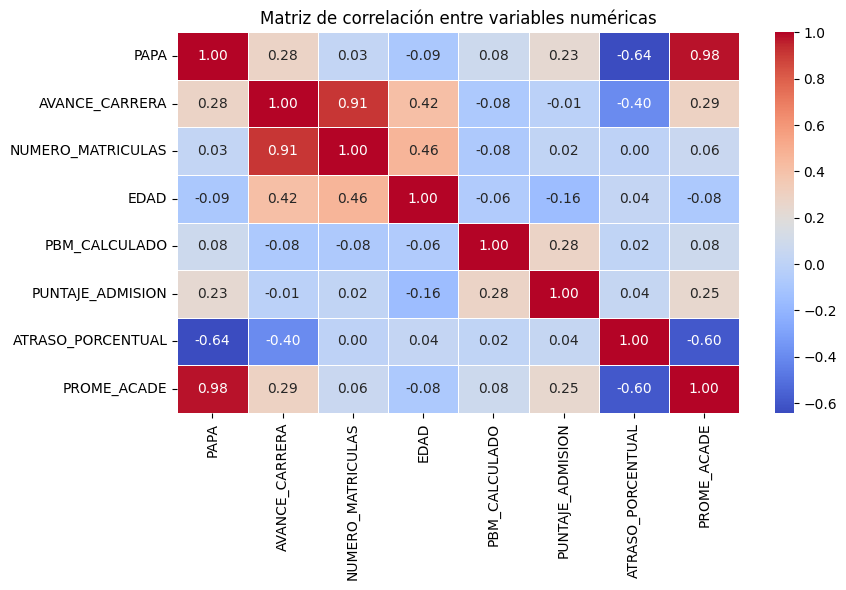

In [4]:
# Variables numéricas para la matriz de correlación
variables_correlacion = [
    "PAPA", "AVANCE_CARRERA", "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION", "ATRASO_PORCENTUAL", "PROME_ACADE"
]

# Calcular matriz de correlación
matriz_correlacion = df_imputado[variables_correlacion].corr()

# Graficar la matriz
plt.figure(figsize=(9, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


In [5]:
df = df_imputado.copy()

# Lista de variables categóricas a analizar
variables_categoricas = [
    "GENERO", "DISCAPACIDAD", "VICTIMAS_DEL_CONFLICTO",
    "SUBACCESO", "NODO_INICIO", "CARACTER_COLEGIO"
]

# Crear diccionario para guardar resultados
resumen_categoricas = {}

# Calcular estadísticas para cada variable categórica
for var in variables_categoricas:
    print(f"\n=== {var} ===")
    
    # Moda
    moda = df[var].mode()[0] if not df[var].mode().empty else None
    print(f"Moda: {moda}")
    
    # Cardinalidad
    cardinalidad = df[var].nunique(dropna=False)
    print(f"Cardinalidad: {cardinalidad}")
    
    # Frecuencia absoluta
    print("Frecuencia absoluta:")
    print(df[var].value_counts(dropna=False))
    
    # Frecuencia relativa
    print("Frecuencia relativa (%):")
    print((df[var].value_counts(normalize=True, dropna=False) * 100).round(2))



=== GENERO ===
Moda: HOMBRE
Cardinalidad: 2
Frecuencia absoluta:
HOMBRE    720
MUJER     563
Name: GENERO, dtype: int64
Frecuencia relativa (%):
HOMBRE    56.12
MUJER     43.88
Name: GENERO, dtype: float64

=== DISCAPACIDAD ===
Moda: NO
Cardinalidad: 6
Frecuencia absoluta:
NO             1276
AUDITIVA          2
VISUAL            2
FISICA            1
MÚLTIPLE          1
PSICOSOCIAL       1
Name: DISCAPACIDAD, dtype: int64
Frecuencia relativa (%):
NO             99.45
AUDITIVA        0.16
VISUAL          0.16
FISICA          0.08
MÚLTIPLE        0.08
PSICOSOCIAL     0.08
Name: DISCAPACIDAD, dtype: float64

=== VICTIMAS_DEL_CONFLICTO ===
Moda: NO
Cardinalidad: 2
Frecuencia absoluta:
NO    1166
SI     117
Name: VICTIMAS_DEL_CONFLICTO, dtype: int64
Frecuencia relativa (%):
NO    90.88
SI     9.12
Name: VICTIMAS_DEL_CONFLICTO, dtype: float64

=== SUBACCESO ===
Moda: PROGRAMA DE ADMISIÓN ESPECIAL PARA LOS PROGRAMAS DE PREGRADO SEDE LA PAZ
Cardinalidad: 5
Frecuencia absoluta:
PROGRAMA DE AD

### Boxplot para visualizar los outliers

In [1]:
# Seleccionar variables numéricas relevantes
variables_numericas = [
    "PAPA", "AVANCE_CARRERA", "EDAD", "NUMERO_MATRICULAS",
    "PBM_CALCULADO", "AVANCE_ESPERADO", "ATRASO_PORCENTUAL"
]

# Calcular límites de outliers por IQR
outliers_info = {}
for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "num_outliers": len(outliers),
        "percent_outliers": 100 * len(outliers) / len(df)
    }

outliers_info


NameError: name 'df' is not defined

| Variable               | Q1   | Q3   | IQR  | Outliers (%) | Comentario clave                                                          |
| ---------------------- | ---- | ---- | ---- | ------------ | ------------------------------------------------------------------------- |
| **PAPA**               | 3.8  | 4.2  | 0.4  | 2.16%        | Ligeros outliers por debajo de 3.2 y por encima de 4.8.                   |
| **AVANCE\_CARRERA**    | 15.5 | 62.1 | 46.6 | 0.00%        | No presenta outliers según IQR.                                           |
| **EDAD**               | 19.0 | 23.0 | 4.0  | 1.47%        | Estudiantes con más de 29 años (posibles rezagados o cambios de carrera). |
| **NUMERO\_MATRICULAS** | 4.0  | 9.0  | 5.0  | 0.00%        | Sin valores atípicos según IQR.                                           |
| **PBM\_CALCULADO**     | 2.0  | 11.0 | 9.0  | 11.51%       | ¡Alta proporción de outliers! Podría haber codificación no uniforme.      |
| **AVANCE\_ESPERADO**   | 32.0 | 72.0 | 40.0 | 0.00%        | Esperado, pues se deriva de `NUMERO_MATRICULAS * 8`.                      |
| **ATRASO\_PORCENTUAL** | 5.7  | 15.9 | 10.2 | 5.49%        | Algunos estudiantes tienen rezagos muy altos (> 31%).                     |


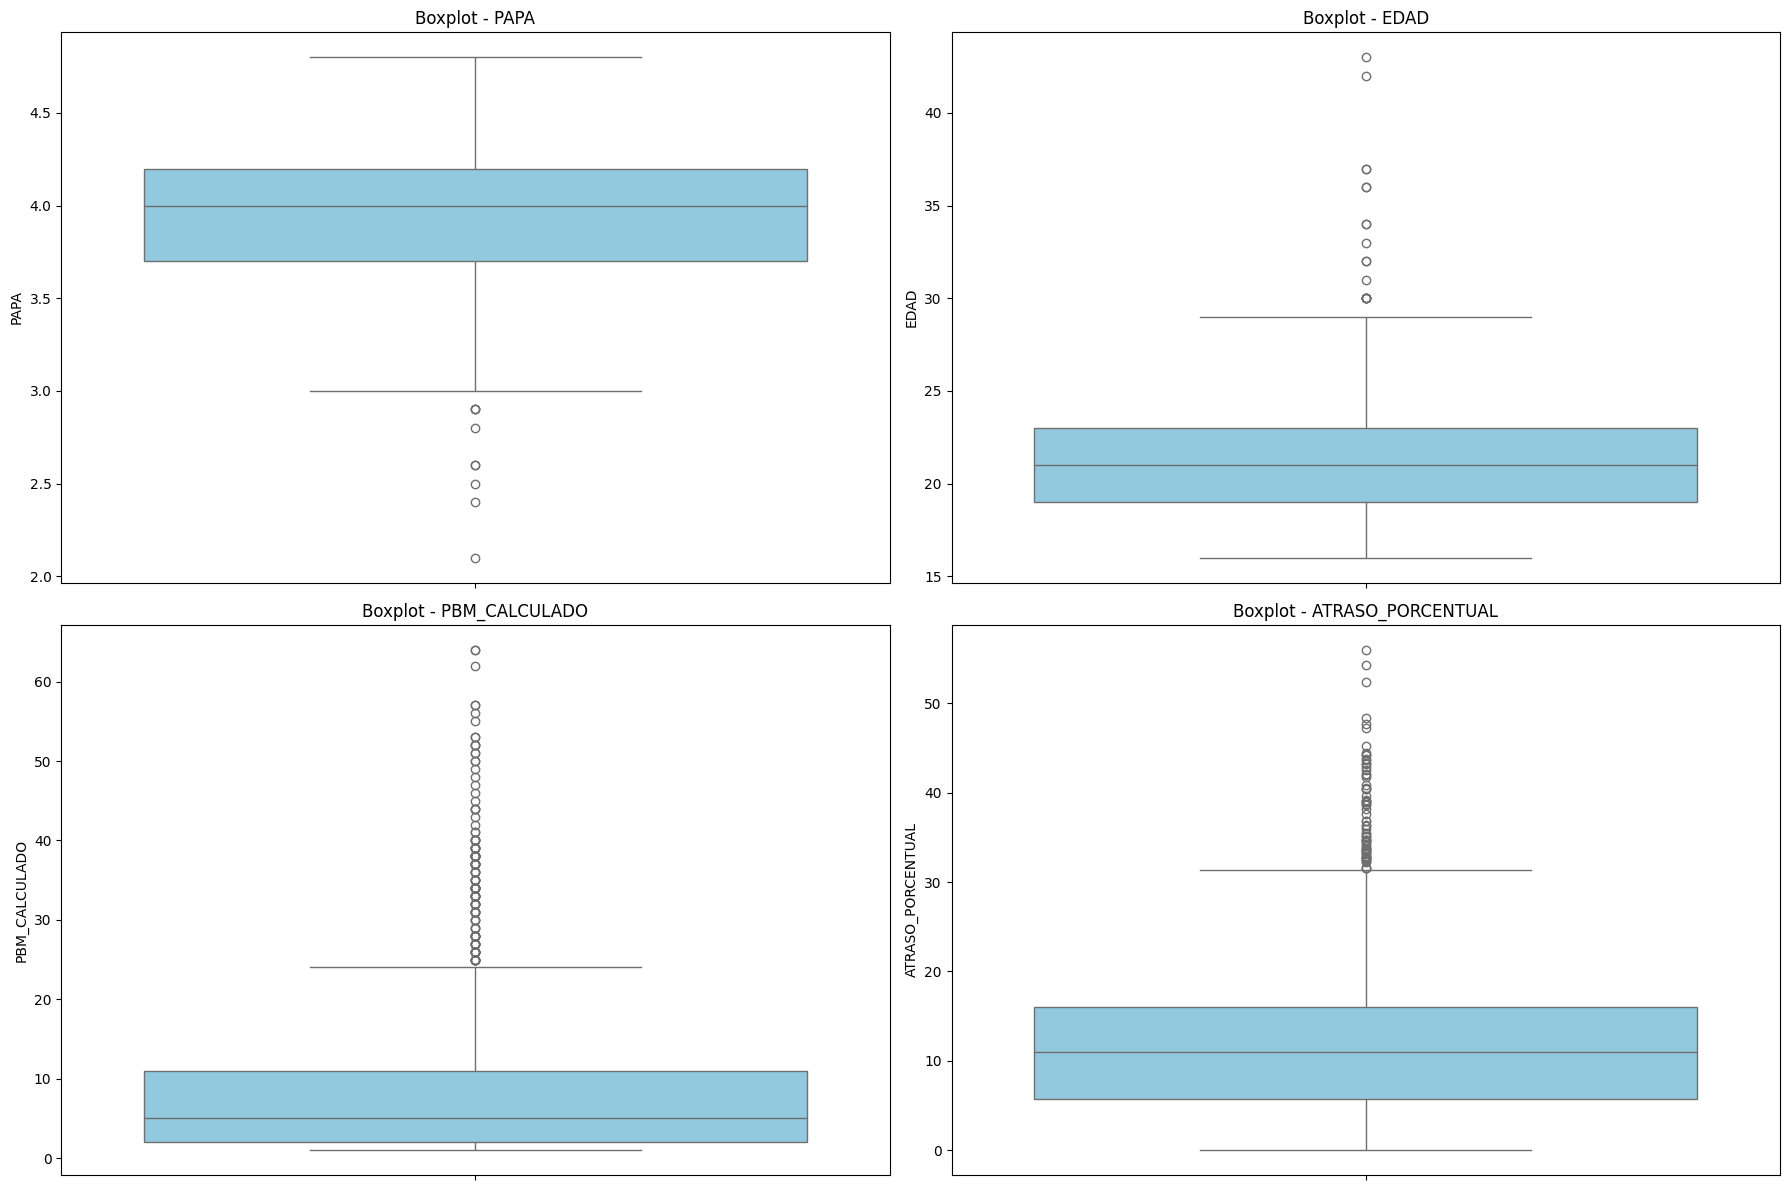

In [6]:
# Lista de variables numéricas relevantes
variables_numericas = [
    "PAPA", "EDAD",
    "PBM_CALCULADO", "ATRASO_PORCENTUAL"
]

# Crear grid de boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
axes = axes.flatten()

# Generar un boxplot por variable
for i, col in enumerate(variables_numericas):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot - {col}", fontsize=12)

# Eliminar gráficos vacíos si no se usan todos los subplots
for j in range(len(variables_numericas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


* `PAPA` muestra algunos valores atípicos por encima de 4.8, aunque no parecen extremos (máx ≈ 5.0).

* `EDAD` presenta algunos casos > 29 años, posiblemente estudiantes con trayectorias no lineales (transfers, pausas).

* `PBM_CALCULADO` tiene valores significativamente altos que podrían deberse a codificaciones extensas de categorías (habría que revisar si es ordinal o un score).

* `ATRASO_PORCENTUAL` tiene una cola derecha prolongada, lo que indica a algunos estudiantes con alto rezago.

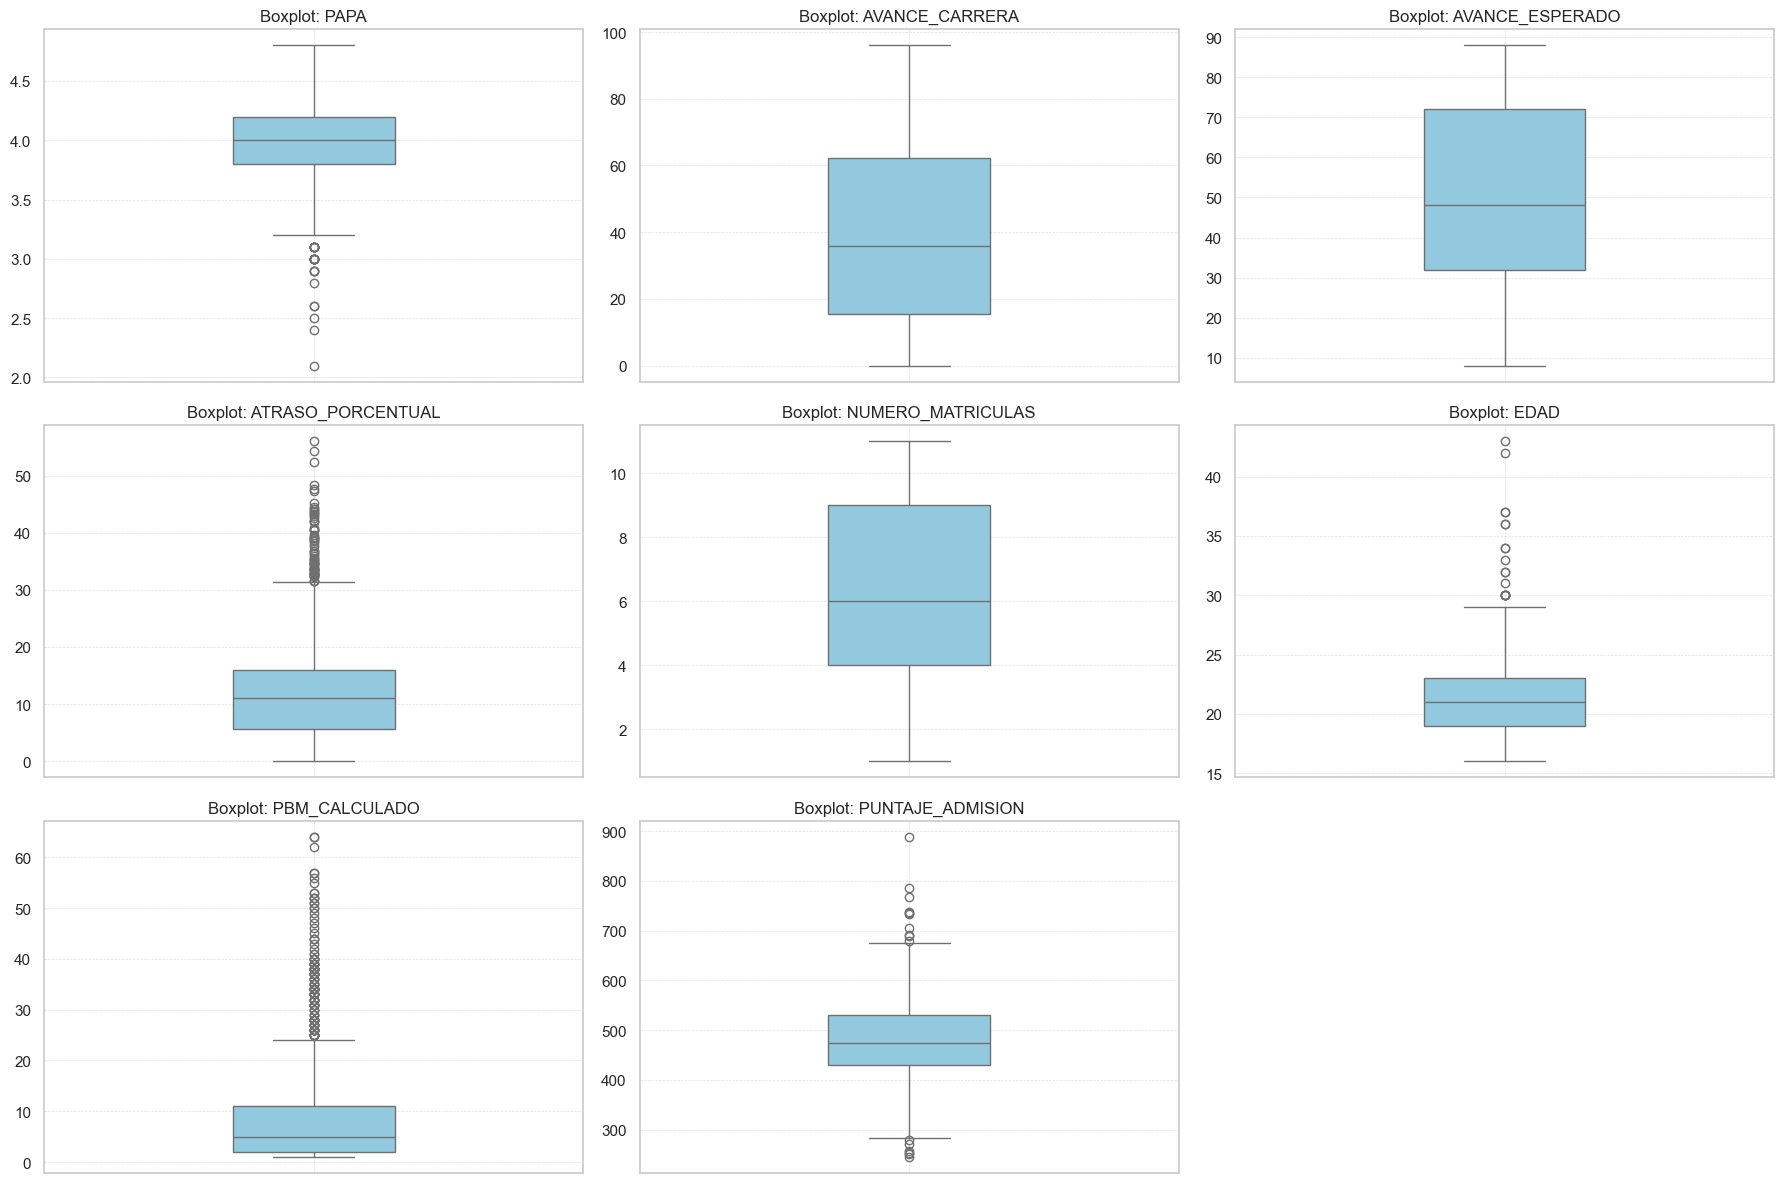

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas que deseas analizar
variables_numericas = [
    "PAPA", "AVANCE_CARRERA", "AVANCE_ESPERADO",
    "ATRASO_PORCENTUAL", "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Tamaño de la figura y estilo
sns.set(style="whitegrid", palette="Set2")
n_cols = 3
n_rows = -(-len(variables_numericas) // n_cols)  # Redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    sns.boxplot(y=df[var], ax=axes[i], color="skyblue", width=0.3)
    axes[i].set_title(f"Boxplot: {var}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Ocultar ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [11]:
# Lista de variables numéricas
variables_numericas = [
    "PAPA", "AVANCE_CARRERA", "AVANCE_ESPERADO",
    "ATRASO_PORCENTUAL", "NUMERO_MATRICULAS", "EDAD",
    "PBM_CALCULADO", "PUNTAJE_ADMISION"
]

# Función para describir un boxplot numéricamente
def resumen_boxplot(serie):
    q1 = serie.quantile(0.25)
    q2 = serie.quantile(0.50)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr
    outliers = ((serie < li) | (serie > ls)).sum()
    return {
        "Q1": round(q1, 2),
        "Mediana": round(q2, 2),
        "Q3": round(q3, 2),
        "IQR": round(iqr, 2),
        "Límite inferior": round(li, 2),
        "Límite superior": round(ls, 2),
        "Outliers": int(outliers)
    }

# Generar resumen para todas las variables
resumen_boxplots = {
    var: resumen_boxplot(df[var]) for var in variables_numericas
}

# Mostrar resultados ordenados
import pandas as pd
pd.DataFrame(resumen_boxplots).T


,Q1,Mediana,Q3,IQR,Límite inferior,Límite superior,Outliers
PAPA,3.80,4.00,4.20,0.40,3.20,4.80,28.0
AVANCE_CARRERA,15.45,36.00,62.10,46.65,-54.53,132.08,0.0
AVANCE_ESPERADO,32.00,48.00,72.00,40.00,-28.00,132.00,0.0
ATRASO_PORCENTUAL,5.70,11.00,16.00,10.30,-9.75,31.45,68.0
NUMERO_MATRICULAS,4.00,6.00,9.00,5.00,-3.50,16.50,0.0
EDAD,19.00,21.00,23.00,4.00,13.00,29.00,18.0
PBM_CALCULADO,2.00,5.00,11.00,9.00,-11.50,24.50,148.0
PUNTAJE_ADMISION,429.70,473.55,529.57,99.87,279.90,679.37,16.0


### Violin plots

C:\Users\andre\AppData\Local\Temp\ipykernel_6624\4208356969.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_6624\4208356969.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_6624\4208356969.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_6624\4208356969.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


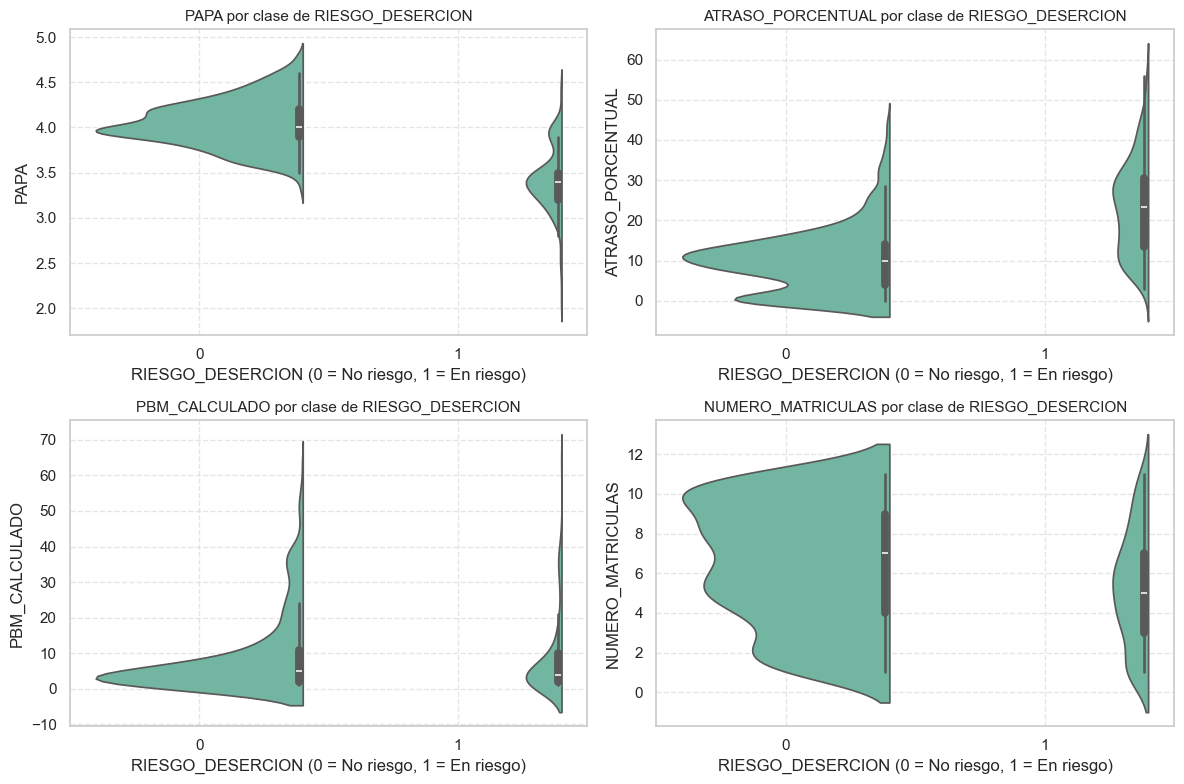

In [12]:
# Variables numéricas más relevantes para visualizar
variables_relevantes = [
    "PAPA", "ATRASO_PORCENTUAL", 
    "PBM_CALCULADO", "NUMERO_MATRICULAS"
]

# Estilo visual
# sns.set(style="whitegrid", palette="Set2")

# Tamaño y configuración de los gráficos
n_cols = 2
n_rows = -(-len(variables_relevantes) // n_cols)  # Redondeo hacia arriba
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Graficar cada variable
for i, var in enumerate(variables_relevantes):
    sns.violinplot(
        data=df, x="RIESGO_DESERCION", y=var,
        ax=axes[i], inner="box", split=True, scale="count"
    )
    axes[i].set_title(f"{var} por clase de RIESGO_DESERCION", fontsize=11)
    axes[i].set_xlabel("RIESGO_DESERCION (0 = No riesgo, 1 = En riesgo)")
    axes[i].set_ylabel(var)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [13]:
df["RIESGO_DESERCION"].value_counts(normalize=True) * 100


0    85.346843
1    14.653157
Name: RIESGO_DESERCION, dtype: float64